<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">Tipologia i cicle de vida de les dades · <b>Pràctica 2</b></p>
<p style="margin: 0; text-align:right;">Màster universitari en Ciència de dades (Data science)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudis de Informàtica, Multimèdia i Telecomunicació</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>


# Pràctica 2: Neteja i anàlisi de les dades

### **Autors:** Andrés Laverde Marín i Josep Mª Espasa Verdés

Aquesta pràctica es basarà en el tractament del dataset [Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic).

### Índex

<ol start="1">
  <li>Descripció del dataset (Jo faria una petita introducció aqui, si vols la podem desenvolupar en detall al document)</li>
  <li>Integració i selecció de les dades d'interès a analitzar</li>
  <li>Neteja de les dades</li>
  <li>Anàlisi de les dades</li>
  <li>Representació dels resultats</li>
  <li>Resolució del problema</li>
</ol>

In [1]:
# Carrega les llibreries necessàries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 1. Descripció del dataset 

El dataset seleccionat ha estat [Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic) que ens proporciona *kaggle* amb l'objectiu de determinar quins dels pasatgers del titanic sobreviuen a [l'accident del 15 d'abril de 1912](https://es.wikipedia.org/wiki/RMS_Titanic) en el qual van morir 1514 persones de les 2223 que viatjaven en el transatlàntic.

L'objectiu de la pràctica és entendre i predir quins grups de persones tenen més probabilitats de sobreviure, encara que sabem que hi ha un component de sort en la supervivència de les persones. Per dur a terme aquest objectiu partim de dos conjunts de dades, un que ens servirà com a entrenament, el qual compte amb 891 registres, i l'altre com test, el qual compte amb 418 registres, per validar els algoritmes de predicció fets servir.

# 2. Intregració i selecció de les dades d'interès a analitzar

Primerament es carregen les dades dels fitxers de partida (format CSV) en objectes DataFrames de Pandas, per poder realitzar les diferents anàlisis.

In [2]:
# Carrega els fitxers de dades (entrenament i test) en dos dataframes
titanic_train_raw = pd.read_csv(os.getcwd()+'/data/in/train.csv')
titanic_test_raw = pd.read_csv(os.getcwd()+'/data/in/test.csv')

A mode d'exploració inicial, es mostra les primeres files dels DataFrames i es comprova que la tipologia dels diferents atributs carregats és la correcta.

In [3]:
# Mostra les primeres files de les dades carregades
titanic_train_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Comprovacio de la tipologia de les dades carregades
titanic_train_raw.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
titanic_test_raw.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
titanic_test_raw.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

De tots els atributs recollits en el DataSet, les dades de nom (*Name*), número de tiquet (*Ticket*) i número de cabina (*Cabin*) són atributs que, per la seva pròpia naturalesa, no es poden considerar com factors que poden afectar la supervivència o no d'un determinat passatger i, per tant, no es seleccionaran les columnes associades a aquests atributs. A continuació es realitza aquesta selecció. Igualment l'identificador de passatger (*PasssengerID*) té aquesta característica però es deixa la variable per tal de facilitar la identificació dels diferents passatgers i el seu tractament.

In [7]:
# Elimina les columnes 'Name' i 'Ticket' dels DataFrames d'entrenament i test
titanic_train = titanic_train_raw.drop(columns=['Name', 'Ticket', 'Cabin'])
titanic_test = titanic_test_raw.drop(columns=['Name', 'Ticket', 'Cabin'])

# 3. Neteja de les dades

### 3.1 Les dades contenen zeros o elements buits? Com gestionaries aquests casos?

### Anàlisi zeros

Per cercar els atributs que contenen zeros, s'utilitza el mètode ```describe``` de pandas que mostra un resum estadístic de les variables quantitatives, així, entre les dades mostrades, hi ha els valors mínims que, en cas de contenir zeros, seran els valors mínims.

In [8]:
# Mostra un resum estadistic dels DataFrames d'entrenament i test
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
titanic_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


Tal com es pot observar en la sortida de dades, els camps que contenen zeros són la supervivència (*Survived*), el nombre de germans o cònjuge a bord del Titànic (*Sibsp*), el nombre de pares o nens a bord del Titànic (*Parch*) i el preu del bitllet (*Fare*).

De tots ells, són totalment lògics i legítims els valors zero en el atributs *Survived, Sibsp* i *Parch*, en canvi, un preu de bitllet igual a zero, inicialment, no resulta lògic, més enllà de considerar que aquests passatgers com pertanyents a la tripulació, segurament la hipòtesis més raonable. Després d'una recerca per les xarxes amb els noms de les persones que acompleixen aquesta condició es dóna com a raonable aquest fet i s'accepten com a legítims, també, aquests valors de zero pel preu de bitllet i, per tant, no es relitzarà cap tractament al respecte.

### Anàlisi valors nuls

In [10]:
# Comprova el nombre de dades amb valors nuls en les dades d'entrenament i de test
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [11]:
titanic_test.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

Tal com es pot veure en la sortida de dades, existeixen valors nuls en l'atribut d'edat (*Age*) en els dos DataSets, tant el d'entrenament com el de test, i, en el cas del conjunt de dades d'entrenament, també presenta valors nuls el camp del port d'embarcament (*Embarked*), en dos instàncies, mentre en el cas del conjunt de dades de test, presenta un valor nul el camp del preu del bitllet (*Fare*).

El tractament d'aquests valors nuls es realitza de manera diferencial segons l'atribut considerat, així, els nuls en els camps de port d'embarcament (*Embarked*) i preu del bitllet (*Fare*), donat que tenen una freqüència molt baixa, s'intentaran corregir manualment, gràcies a la gran quantitat d'informació disponible per la xarxa, referent al viatge del Titànic. En canvi, en el tractament dels valors nuls de l'atribut d'edat (*Age*), que presenta una freqüència important (177 i 86 instàncies en el conjunt de dades d'entrenament i de test, respectivament) no pot plantejar-se la correcció manual i, per tant, es planteja algun altre tipus de tractament que impliqui l'aplicació d'un mètode general. Així, una primera opció seria eliminar aquests registres nuls, però aquesta opció es descarta degut a la important pèrdua d'informació que representa, per tant, s'opta per emprar un mètode d'imputació de dades i, d'entre els disponibles, s'elegeix el missForest, ja que és considerat un mètode robust que, alhora, permet treballar amb dades mixtes.

Seguidament es realitza la imputació manual dels valors nuls dels atributs de port d'embarcament (*Embarked*) i preu del bitllet (*Fare*).

In [12]:
# Mostra els valors nuls del dataframe d'entrenament
titanic_train_raw[titanic_train_raw['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Tal com es recull en l'[article referent a Mrs Martha Evelyn Stone](https://www.encyclopedia-titanica.org/titanic-survivor/martha-evelyn-stone.html) de l'enciclopèdia titànica, aquestes passatgeres van embarcar al Titànic al port de Southampot, per tant, els correspon un valor d''*S*' en el camp '*Embarked*'. A continuació es realitza aquesta imputació.

In [13]:
# Imputacio manual del port d'embarcament
titanic_train.loc[titanic_train['PassengerId']==62, ['Embarked']]='S'
titanic_train.loc[titanic_train['PassengerId']==830, ['Embarked']]='S'

In [14]:
# Mostra els valors nuls del dataframe de test
titanic_test_raw[titanic_test_raw['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


Tal com es recull en l'[article referent a Mr Thomas Storey](https://www.encyclopedia-titanica.org/titanic-victim/thomas-storey.html) de l'enciclopèdia titànica, aquest passatger es pot considerar tripulació i, per tant, se l'imputarà un preu de bitllet igual a zero. A continuació es realitza aquesta imputació.

In [15]:
# Imputacio manual del port d'embarcament
titanic_test.loc[titanic_test['PassengerId']==1044, ['Fare']]=0

A continuació s'imputen els valors nuls d'edat emprant el mètode missForest, cal comentar que s'utilitza la implementació de la llibreria ```missingpy``` que, en cas de no estar instal.lada, es pot instal·lar mitjançant la comanda ```pip install missingpy```, per a més informació al respecte, es pot consultar la [documentació de la llibreria missingpy](https://pypi.org/project/missingpy/). D'altra banda, també és important indicar que les variables categòriques s'han recodificat com vectors de tipus one-hot, per tal de poder ser interpretades correctament.

In [16]:
# Preparació de les dades categoriques com vectors one-hot
titanic_train = pd.get_dummies(titanic_train, ['Sex', 'Embarked'])
titanic_test = pd.get_dummies(titanic_test, ['Sex', 'Embarked'])

# Carrega la llibreria que conte la implementacio missForest
from missingpy import MissForest

# Imputa els valors nuls emprant el metode missForest tot indicant les columnes de valors categorics
imputer = MissForest()
X_imputed_train = imputer.fit_transform(
                    titanic_train, cat_vars=[titanic_train.columns.get_loc('Sex_female'),
                                        titanic_train.columns.get_loc('Sex_male'),
                                        titanic_train.columns.get_loc('Embarked_C'),
                                        titanic_train.columns.get_loc('Embarked_Q'),
                                        titanic_train.columns.get_loc('Embarked_S')]
                    )

X_imputed_test = imputer.fit_transform(
                    titanic_test, cat_vars=[titanic_test.columns.get_loc('Sex_female'),
                                        titanic_test.columns.get_loc('Sex_male'),
                                        titanic_test.columns.get_loc('Embarked_C'),
                                        titanic_test.columns.get_loc('Embarked_Q'),
                                        titanic_test.columns.get_loc('Embarked_S')]
                    )


# Converteix la matriu de sortida en un DataFrame
titanic_train_final = pd.DataFrame(X_imputed_train, columns=titanic_train.columns.tolist())
titanic_test_final = pd.DataFrame(X_imputed_test, columns=titanic_test.columns.tolist())

/home/josepm/anaconda3/lib/python3.7/site-packages/missingpy/missforest.py:407: RuntimeWarning: invalid value encountered in long_scalars
  (Ximp[:, self.cat_vars_] != Ximp_old[:, self.cat_vars_])) / n_catmissing


Iteration: 0


/home/josepm/anaconda3/lib/python3.7/site-packages/missingpy/missforest.py:407: RuntimeWarning: invalid value encountered in long_scalars
  (Ximp[:, self.cat_vars_] != Ximp_old[:, self.cat_vars_])) / n_catmissing


Iteration: 1


/home/josepm/anaconda3/lib/python3.7/site-packages/missingpy/missforest.py:407: RuntimeWarning: invalid value encountered in long_scalars
  (Ximp[:, self.cat_vars_] != Ximp_old[:, self.cat_vars_])) / n_catmissing


Iteration: 2


/home/josepm/anaconda3/lib/python3.7/site-packages/missingpy/missforest.py:407: RuntimeWarning: invalid value encountered in long_scalars
  (Ximp[:, self.cat_vars_] != Ximp_old[:, self.cat_vars_])) / n_catmissing


Iteration: 0


/home/josepm/anaconda3/lib/python3.7/site-packages/missingpy/missforest.py:407: RuntimeWarning: invalid value encountered in long_scalars
  (Ximp[:, self.cat_vars_] != Ximp_old[:, self.cat_vars_])) / n_catmissing


Iteration: 1


/home/josepm/anaconda3/lib/python3.7/site-packages/missingpy/missforest.py:407: RuntimeWarning: invalid value encountered in long_scalars
  (Ximp[:, self.cat_vars_] != Ximp_old[:, self.cat_vars_])) / n_catmissing


Iteration: 2


/home/josepm/anaconda3/lib/python3.7/site-packages/missingpy/missforest.py:407: RuntimeWarning: invalid value encountered in long_scalars
  (Ximp[:, self.cat_vars_] != Ximp_old[:, self.cat_vars_])) / n_catmissing


Iteration: 3


/home/josepm/anaconda3/lib/python3.7/site-packages/missingpy/missforest.py:407: RuntimeWarning: invalid value encountered in long_scalars
  (Ximp[:, self.cat_vars_] != Ximp_old[:, self.cat_vars_])) / n_catmissing


Iteration: 4
Iteration: 5


/home/josepm/anaconda3/lib/python3.7/site-packages/missingpy/missforest.py:407: RuntimeWarning: invalid value encountered in long_scalars
  (Ximp[:, self.cat_vars_] != Ximp_old[:, self.cat_vars_])) / n_catmissing


Abans de continuar, hem de notar que totes les edats amb valors més grans o iguals a 1 no poden ser valors decimals, pel contrari totes les edats menors d'1 indiquen els mesos de vida, per tant s'arrodoneixen tots els valors obtinguts a la predicció.

In [17]:
r = []
for i in titanic_train_final["Age"]:
    if i < 1:
        r.append(round(i, 1))
    else:
        r.append(round(i))

titanic_train_final["Age"] = r

Es repeteix el procediment anterior per les dades de test

In [18]:
r = []
for i in titanic_test_final["Age"]:
    if i < 1:
        r.append(round(i, 1))
    else:
        r.append(round(i))

titanic_test_final["Age"] = r

### 3.2 Anàlisi valors extrems

**Conjunt d'entrenament**

Per trobar i facilitar l'enteniment dels valors extrems de les variables numèriques es realitza un gràfic boxplot  que ens permeti identificar ràpidament si tenim valors extrems a les nostres dades. Considerant valors extrems aquells valors que es trobin allunyats 3 desviacions estàndard respecte de la mitjana del conjunt.

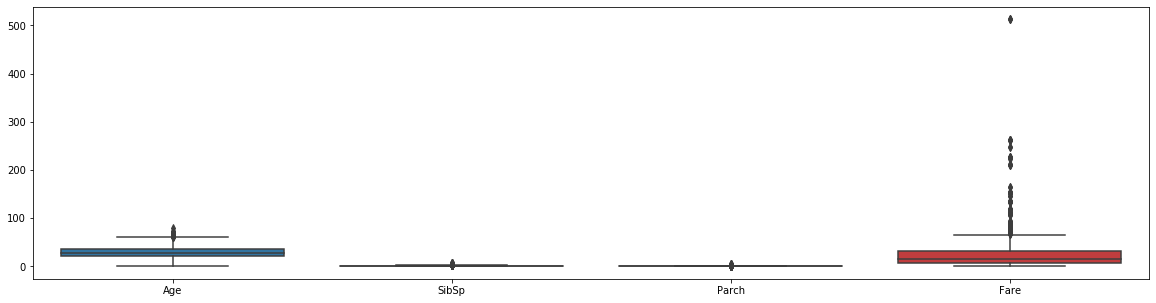

In [19]:
# Conjunt de varialbes numeriques a analitzar valors extrems
numeric_cols = ['Age', 'SibSp', 'Parch', 'Fare']

# Boxplot pel conjunt de variables numeriques
ax = plt.subplots(1, 1, figsize=(20, 5))
ax = sns.boxplot(data=titanic_train_final[numeric_cols])

En aquesta primera visualització s'observa que les dades que tenen valors extrems són les variables *Age, SibSp, Parch, Fare*. Aquestes variables són les que s'analitzen a continuació, per tal de discriminar quins valors es poden considerar que estan fora de rang i quins no.

* En el cas de l'edad tenim que el valor màxim és 80, per tant aquests valors són totalment normals, ja que encara que hi hagin poques persones grans és possible que un passanger del titanic tingui 80 anys, encara que no sigui molt comú és possible, per tant aquesta variable no la considerarem en el cas de valors outliers.

* La variable *SibSp*, és la variable que descriu el # de germans / mullers a bord del titanic, aquesta variable s'estudia a continuació.

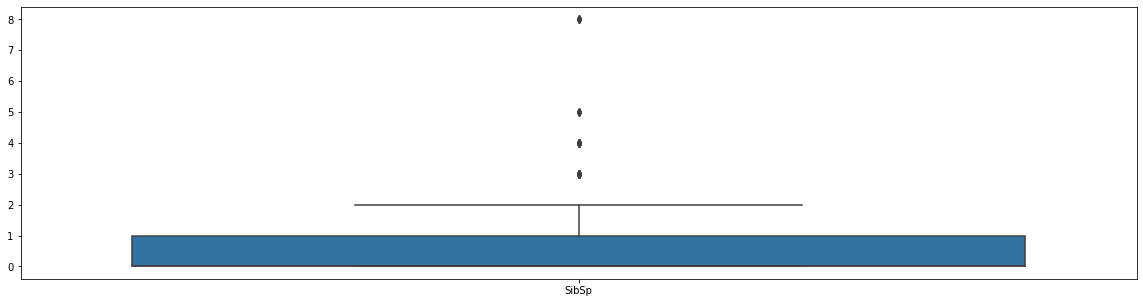

In [20]:
ax = plt.subplots(1, 1, figsize=(20, 5))
ax = sns.boxplot(data=titanic_train_final[[ "SibSp"]])

In [21]:
print(titanic_train_final[titanic_train_final["SibSp"] == 8])

     PassengerId  Survived  Pclass   Age  SibSp  Parch   Fare  Sex_female  \
159        160.0       0.0     3.0   9.0    8.0    2.0  69.55         0.0   
180        181.0       0.0     3.0  11.0    8.0    2.0  69.55         1.0   
201        202.0       0.0     3.0   9.0    8.0    2.0  69.55         0.0   
324        325.0       0.0     3.0   8.0    8.0    2.0  69.55         0.0   
792        793.0       0.0     3.0  11.0    8.0    2.0  69.55         1.0   
846        847.0       0.0     3.0   8.0    8.0    2.0  69.55         0.0   
863        864.0       0.0     3.0   9.0    8.0    2.0  69.55         1.0   

     Sex_male  Embarked_C  Embarked_Q  Embarked_S  
159       1.0         0.0         0.0         1.0  
180       0.0         0.0         0.0         1.0  
201       1.0         0.0         0.0         1.0  
324       1.0         0.0         0.0         1.0  
792       0.0         0.0         0.0         1.0  
846       1.0         0.0         0.0         1.0  
863       0.0      

S'observa que les edats predites i el valor 8 en *SibSp* tenen sentit, ja que hi ha un parell de bessons de 9 anys, que, per tant no són dades incoherents, en altres paraules, encara que tinguin un valor extrany o poc comú no són valors incoherents i per tant s'eliminaran ni tractaran d'una manera diferent.

* La variable *Parch* fa referencia al nombre de pares o fills a bord del titanic, també conté valors extrems que s'estudien a continuació:

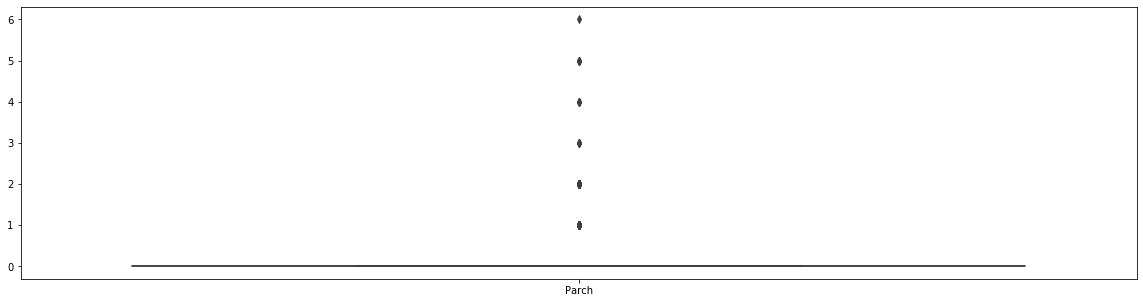

In [22]:
ax = plt.subplots(1, 1, figsize=(20, 5))
ax = sns.boxplot(data=titanic_train_final[[ "Parch"]])

En aquest cas tampoc es consideren valors extrems ja que al igual que en el cas de la variable *SibSp*, efectivament, hi ha valors poc comuns però aquests, no són valors incoherents o impossibles.

* La variable *Fare*, la qual fa referencia a la tarifa pels passatgers, té valors extrems que s'analitzen a continuació:

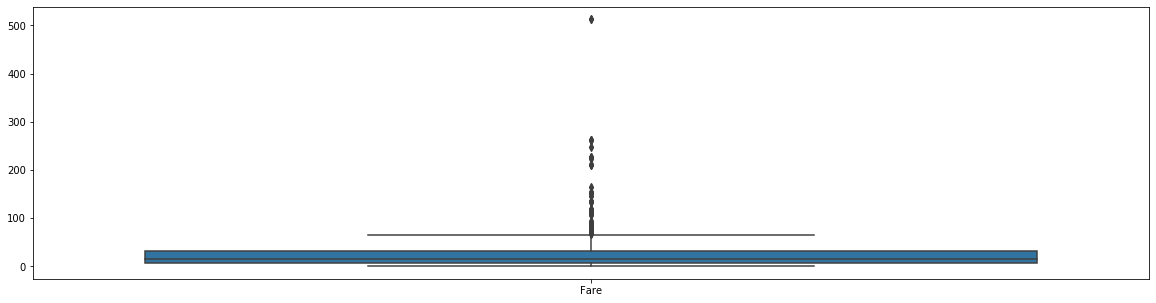

In [23]:
ax = plt.subplots(1, 1, figsize=(20, 5))
ax = sns.boxplot(data=titanic_train_final[[ "Fare"]])

Encara que matemàticament es consideri que aquests valors són extrems (per sobre de 3 desviacions estàndard) realment no ho són, el que tenim, és que majoritàriament les tarifes no són cares, però sí que tenim alguna tarifa molt més cara que la resta, de fet, avui en dia ens podem trobar a la mateixa situació quan viatgem en un vol intercontinental per exemple, majoritàriament les tarifes tendeixen a estar en un rang de preus, però també tenim una primera classe (amb molts menys seients) que fa que hi hagi tarifes molt per sobre de les classes convencionals.

**Conjunt de test**

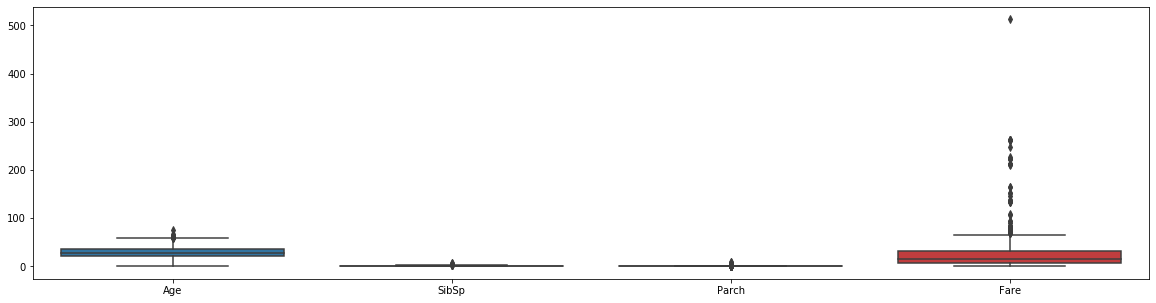

In [24]:
ax = plt.subplots(1, 1, figsize=(20, 5))
ax = sns.boxplot(data=titanic_test_final[numeric_cols])

S'observa una situació molt similar que en el dataset de train, per tant, no tornarem a fer el mateix raonament que ja hem fet i el que farem serà aplicar directament el canvi aplicat al dataset de train:

# 4 i 5. Anàlisi de les dades i representació gràfica dels resultats

### 4.1 Selecció dels grups de dades que es volen analitzar/comparar (planificació de les anàlisis a aplicar).

Per saber quins grups de dades es seleccionaran, es realitza una anàlisi exploratoria visual de les diferents dades, per veure quina informació es disposa i quina selecció de grups es considera més convenient per dur a terme l'analisi.

#### Exploració de la variable Age:

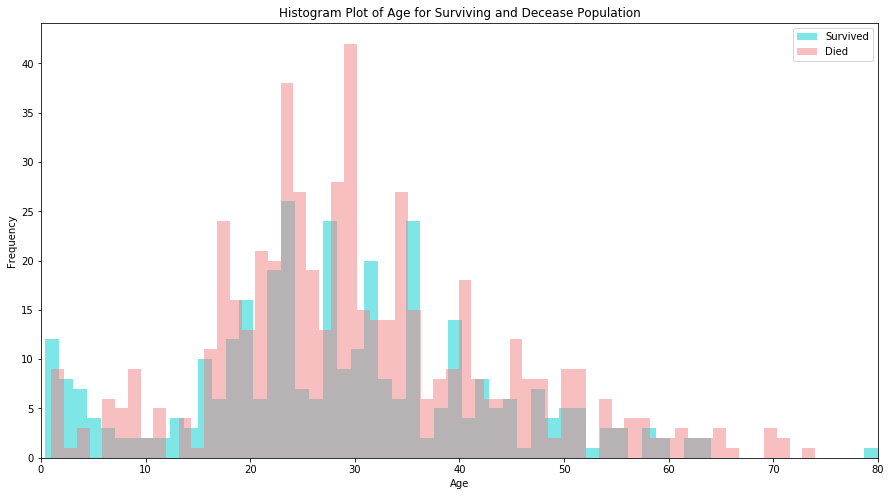

In [25]:
plt.figure(figsize=(15, 8))

plt.hist(titanic_train_final["Age"][titanic_train_final.Survived == 1], 
             bins=60, color="darkturquoise", label="Survived", alpha=0.5)
plt.hist(titanic_train_final["Age"][titanic_train_final.Survived == 0], 
             bins=60, color="lightcoral", label="Died", alpha=0.5)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.legend(loc=1)
plt.xlim(0, 80)
plt.title("Histogram Plot of Age for Surviving and Decease Population");

S'observa que les dues distribucions són molt similars, és normal, ja que la majoria de l'edat de la població es concentra entre els 15 i els 60 anys, per tant és normal que les dues distribucions siguin similars, on sí que es veu realment una diferència notable entre aquestes, és en els nens (entre els 0 i els 16), és a dir una major proporció de supervivents eren nens i posa de manifest que les persones grans els hi van donar un lloc a les barques salvavides.

#### Exploració de la variable Fare:

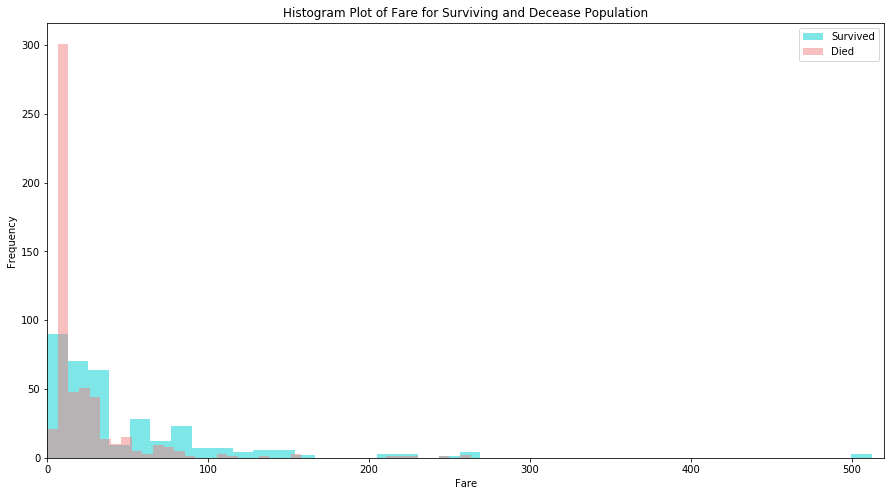

In [26]:
plt.figure(figsize=(15, 8))

plt.hist(titanic_train_final["Fare"][titanic_train_final.Survived == 1], 
             bins=40, color="darkturquoise", label="Survived", alpha=0.5)
plt.hist(titanic_train_final["Fare"][titanic_train_final.Survived == 0], 
             bins=40, color="lightcoral", label="Died", alpha=0.5)
plt.xlabel("Fare")
plt.ylabel("Frequency")
plt.legend(loc=1)
plt.xlim(0,520)
plt.title("Histogram Plot of Fare for Surviving and Decease Population");

A diferencia de la variable *Age* s'observa que les distribucions són clarament diferents per les tarifes dels supervivents comparades amb els morts, per tant, indica que la variable *Fare* serà un bon predictor a l'hora de dur a terme el nostre model final. Si s'observa en detall la distribució, els passatgers que han pagat una tarifa més baixa han tingut menys probabilitat de sobreviure que els que han pagat una tarifa més alta.

La tarifa segurament estarà fortament correlacionada amb la classe, ja que les tarifes de classes més altes per les classes més altes, per tant, segurament aquesta informació ha d'estar fortament correlacionada amb la variable PClass. A continuació es mostra l'histograma de la tarifa segons les tres classes i es pot observar clarament aquest comportament.

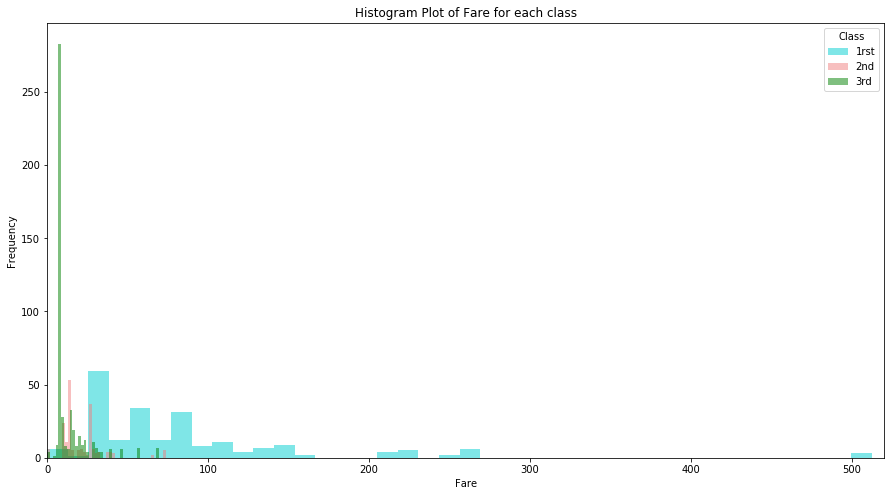

In [27]:
plt.figure(figsize=(15, 8))

plt.hist(titanic_train_final["Fare"][titanic_train_final["Pclass"]==1], 
             bins=40, color="darkturquoise", label="1rst",alpha=0.5)

plt.hist(titanic_train_final["Fare"][titanic_train_final["Pclass"]==2], 
             bins=40, color="lightcoral", label="2nd",alpha=0.5)

plt.hist(titanic_train_final["Fare"][titanic_train_final["Pclass"]==3], 
             bins=40, color="g", label="3rd",alpha=0.5)

plt.xlabel("Fare")
plt.ylabel("Frequency")
plt.legend(title="Class", loc=1)
plt.xlim(0,520)
plt.title("Histogram Plot of Fare for each class");

#### Exploració de la variable PClass:

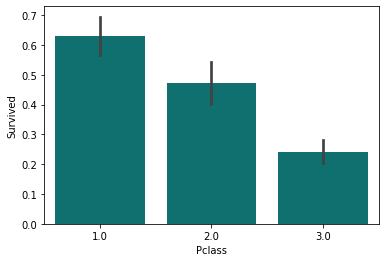

In [28]:
sns.barplot('Pclass', 'Survived', data=titanic_train_final, color="teal")
plt.show()

Aquí s'observa, tal i com s'havia indicat en l'apartat anterior, aquells passatgers que viatgin en primera classe tenen més probabilitats de sobreviure que aquells que viatgen en les altres classes, com era d'esperar.

#### Exploració de la variable Embarked:

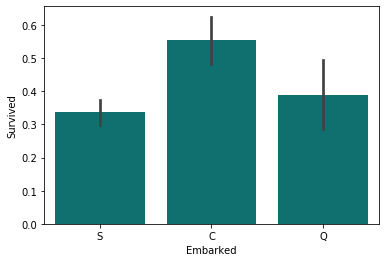

In [29]:
sns.barplot('Embarked', 'Survived', data=titanic_train_raw, color="teal")
plt.show()

Veiem doncs que els passatgers que van embarcar a Cherbourg, tenen la taxa més gran de supervivència i els passatgers que van embarcar a Southhampton tenen una taxa marginalment menor de supervivència que el que van embarcar a Queenstown, segurament aquesta diferència és causada per la classe dels passatgers o amb l'ordre d'assignació de les habitacions, ja que els passatgers que embarquen abans tenen les habitacions més a prop de coberta.

També val la pena mencionar que com que la majoria de passatgers van embarcar a Cherbourg la confiança entorn de la supervivència és la més alta, en altres paraules, com la majoria de gent va embarcar a Cherbourg és lògic que la majoria de gent que sobreviu sigui d'aquest embarcament, ja que componen la majoria de passatgers.

#### Exploració de la variable Sex:

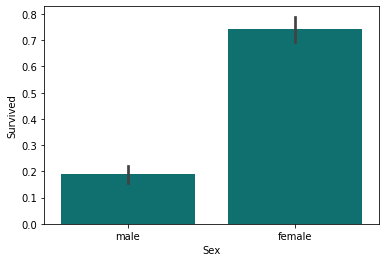

In [30]:
sns.barplot('Sex', 'Survived', data=titanic_train_raw, color="teal")
plt.show()

En aquest cas s'observa que el fet de ser dona implica, clarament, una avantatge de supervivència davant de ser home. Així doncs, la frase, en cas d'evacuació de: "dones i nens primer", sembla que es va acomplir en el cas de l'evacuació del Titànic.

**Comentari:**

En aquest cas hem vist com es comporten les diferents variables del dataset seleccionades anteriorment, de moment podem fer servir totes, tot i que també és possible només seleccionar Fare o class, en funció del mètode final que volem fer servir.

### 4.2 Comprovació de la normalitat i homogeneïtat de la variància

Després de l'anàlisi anterior s'opta per analitzar els grups de dades següents:
* Homes vs Dones
* 0-5 anys vs >5 anys
* Classe 1 vs Classe 2 vs Classe 3

D'aquesta manera, per cadascuna de les agrupacions anteriors, s'analitzarà si la supervivència és significativament diferents, mitjançant les proves estadístiques corresponents. Prèviament, però, cal estudiar si les agrupacions anteriors acompleixen normalitat i homoscedasticitat (igualtat de variàncies).

A continuació es seleccionen les dades de les diferents agrupacions i es comprova la quantitat.


In [31]:
# Agrupacio Homes vs Dones
female_sur = titanic_train_final[titanic_train_final['Sex_female']==1]['Survived']
male_sur = titanic_train_final[titanic_train_final['Sex_male']==1]['Survived']
print("L'agrupació de Dones té {} elements vs Homes que té {} elements.".format(female_sur.size, male_sur.size))

# Agrupacio 0-5 vs >5 anys
chil_sur = titanic_train_final[titanic_train_final['Age']<=5]['Survived']
not_chil_sur = titanic_train_final[titanic_train_final['Age']>5]['Survived']
print("L'agrupació de 0-5 anys té {} elements vs >5 anys que té {} elements.".format(chil_sur.size, not_chil_sur.size))

# Agrupacio Pclass1 vs Pclass2 vs Pclass3
PC1_sur = titanic_train_final[titanic_train_final['Pclass']==1]['Survived']
PC2_sur = titanic_train_final[titanic_train_final['Pclass']==2]['Survived']
PC3_sur = titanic_train_final[titanic_train_final['Pclass']==3]['Survived']
print("L'agrupació de 1a classe té {} elements vs 2a classe que té {} elements i 3a classe que té {}."
      .format(PC1_sur.size, PC2_sur.size, PC3_sur.size))

L'agrupació de Dones té 314 elements vs Homes que té 577 elements.
L'agrupació de 0-5 anys té 44 elements vs >5 anys que té 847 elements.
L'agrupació de 1a classe té 216 elements vs 2a classe que té 184 elements i 3a classe que té 491.


Una vegada realitzada l'agrupació de les dades, s'observa que, per cada grup, el nombre de dades és significativament gran (major a 30), amb el que es considera aplicable el Teorema del Límit Central i, per tant, es suposa la **normalitat de les mitjanes per a totes les agrupacions estudiades**.

A continuació s'estudia l'homogeneïtat de la variància, és a dir, l'homoscedasticitat per cadascuna de les agrupacions, per a fer-ho s'emprarà el test de [Levene](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.levene.html) que està implementat en la llibreria de scipy de Python, mitjançant el qual la hipòtesis nul.la és la igualtat de variancies.


In [32]:
# Carrega la funcio del test de Levene
from scipy.stats import levene

# Test homoscedasticitat agrupacio Homes vs Dones
levene(female_sur, male_sur)

LeveneResult(statistic=5.804100632617495, pvalue=0.016191248809611765)

Es pot observar que, per a un nivell de significació raonable de 0.05, el pvalue és inferior al nivell de significació i, per tant, es rebutja la hipòtesis nul.la, és a dir, **les variancies són significativament diferents en l'agrupació Homes vs Dones**.

In [33]:
# Test homoscedasticitat agrupacio 0-5 vs >5 anys
levene(chil_sur, not_chil_sur)

LeveneResult(statistic=0.9287289611143352, pvalue=0.3354554836424125)

En aquests cas el pvalue és superior al nivell de significació i, per tant, s'accepta la hipòtesis nul.la, és a dir, **les variancies són significativament iguals en l'agrupació 0-5anys vs >5 anys**.

In [34]:
# Test homoscedasticitat agrupacio Pclass1 vs Pclass2 vs Pclass3
levene(PC1_sur, PC2_sur, PC3_sur)

LeveneResult(statistic=18.58999556746011, pvalue=1.232849105549549e-08)

Finalment, en aquesta darrera agrupació, es rebutja la hipòtesis nul.la i, per tant, es pot afirmar que **les variancies són significativament diferents en l'agrupació per classes**.

### 4.3 Aplicació de proves estadístiques per comparar els grups de dades.
**En funció de les dades i de l'objectiu de l'estudi, aplicar proves de constrast d'hipòtesis, correlacions, regressions, etc. Aplicar almenys tres mètodes d'anàlisi diferents.**

En aquest apartat i segons la informació obtinguda en els anteriors apartats, es realitzaran les següents anàlisis:
* **Proves de contrast d'hipòtesis** per tal de poder afirmar si existeixen diferències estadístiques significatives entre els diferents grups de dades definits. 
* **Tests de models predictius** per tal de poder obtenir prediccions sobre la supervivència d'un determinat element. TODO I EXPLICAR QUINS MODELS S'APLICARAN!!

#### Proves de contrast d'hipòtesis

Per l'agrupació Homes vs Dones, s'ha vist que presenta heteroscedasticitat i normalitat, per tant, és aplicable el [test de Welch's](https://en.wikipedia.org/wiki/Welch%27s_t-test) que està implementat en la llibreria d'scipy de Python (definint el paràmetre d'igualtat de variàncies a False) mitjançant el qual, la hipòtesis nul.la suposa igualtat de mitjanes.

In [35]:
# Carrega la funcio del test de Welch
from scipy.stats import ttest_ind

# Test de Welch agrupacio Homes vs Dones
ttest_ind(female_sur, male_sur, equal_var=False)

Ttest_indResult(statistic=18.67183317725917, pvalue=2.2836009226010537e-61)

Segons aquest resultat, donat que el pvalue és inferior al valor de significació, es pot afirmar que **s'observen diferències significatives en la supervivència entre els homes i les dones**.

D'altra banda, l'agrupació 0-5anys vs >5 anys, segons els apartats anteriors, presenta homoscedasticitat i normalitat, per tant, és aplicable el [test d'Student](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) que està implementat en la mateixa llibreria i funció d'scipy de Python que en el cas anterior, ara, però, definint el paràmetre d'igualtat de variàncies a True on, a l'igual que abans, la hipòtesis nul.la suposa igualtat de les mitjanes.

In [36]:
# Test d'Student agrupacio 0-5 vs >5 anys
ttest_ind(chil_sur, not_chil_sur, equal_var=True)

Ttest_indResult(statistic=4.532986765652012, pvalue=6.6107330947308955e-06)

Veient el resultat obtingut, ja que el pvalue és inferior al valor de significació, es pot afirmar que **s'observen diferències significatives en la supervivència entre la població de 0 a 5 anys i els majors de 5 anys**.

Finalment, per analitzar l'agrupació segons la classe del passatger, donat que és una comparació entre més de dos grups, en aquest cas tres on, tot i acomplir-se la normalitat, no hi ha igualtat de variàncies, es realitza el [test de Kruskal-Wallis](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html) que està implementat en la llibreria d'scipy de Python, igualment, es contrastaran les agrupacions dos a dos emprant el test de Welch anteriorment descrit.

In [37]:
# Carrega la funcio del test de Kruskal-Wallis
from scipy.stats import kruskal

# Test de Kruskal-Wallis agrupacio Pclass1 vs Pclass2 vs Pclass3
print('Kruskal-Wallis test:',kruskal(PC1_sur, PC2_sur, PC3_sur))

# Test de Welch agrupacio Pclass1 vs Pclass2
print('Welch test for PClass1 vs PClass2:',ttest_ind(PC1_sur, PC2_sur, equal_var=False))

# Test de Welch agrupacio Pclass1 vs Pclass3
print('Welch test for PClass1 vs PClass3:',ttest_ind(PC1_sur, PC3_sur, equal_var=False))

# Test de Welch agrupacio Pclass2 vs Pclass3
print('Welch test for PClass2 vs PClass3:',ttest_ind(PC2_sur, PC3_sur, equal_var=False))

Kruskal-Wallis test: KruskalResult(statistic=102.77351289976991, pvalue=4.819647000539969e-23)
Welch test for PClass1 vs PClass2: Ttest_indResult(statistic=3.1700336636550834, pvalue=0.0016466817069658033)
Welch test for PClass1 vs PClass3: Ttest_indResult(statistic=10.137416952438056, pvalue=1.7917137736178107e-21)
Welch test for PClass2 vs PClass3: Ttest_indResult(statistic=5.529987345441652, pvalue=7.161251272971601e-08)


Dels resultats obtinguts, donat que tots els pvalues són inferiors al valor de significació, es pot afirmar que **s'observen diferències significatives en la supervivència entre la població segons la classe del bitllet**, igualment, també es comprova que **existeixen diferències significatives entre totes les classes**, segons es pot comprovar del resultat obtingut en els tests de Welch duts a terme contrastant les agrupacions dos a dos.

Com a conclusió final d'aquest apartat, indicar que els diferents contrasts d'hipòtesis duts a terme confirmen el que ja s'havia observat en l'anàlisis descriptiva de les diferents variables realitzada en l'apartat 4.1.

#### Tests de models predictius

Per dur a terme la predicció d'aquest projecte s'estudiaran 3 models diferents **(Si puc implementaré un model de tipus Stacking o Cascading per la predicció)**. Concretament s'entrenaran els models de [regressió lògistica](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), [vectors de suport](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) i [veïns més propers](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html).

Per tal de poder avaluar de manera correcta el millor model de predicció, es dividirà el conjunt de dades d'entrenament en dos conjunts, un d'entrenament pròpiament i un altre de validació que serà el que permetrà elegir el millor model predictiu que, posteriorment, serà l'emprat per realitzar la predicció en el conjunt de dades de test (que ja ha vingut donat de manera segregada). Així doncs, es disposaran de tres conjunts de dades independents: entrenament (train), validació (validation) i test.

Cal indicar que la segregació de les dades d'entrenament es realitzarà en base als coneixements adquirits en els apartats anteriors i, per tant, es realitzarà una selecció aleatòria però estratificada segons el sexe, ja que s'ha comprovat que és l'agrupació amb diferències estadístiques més significatives. Finalment, comentar que s'ha fet una divisió de les dades amb la proporció 60-40 (entrenament-validació).

In [38]:
# Importem la llibreria per fer la partició del nostre dataset
from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import MinMaxScaler

# Preparacio de la variable categorica de classe com vectors one-hot
titanic_train_final = pd.get_dummies(titanic_train_final, columns=['Pclass'])
titanic_test_final = pd.get_dummies(titanic_test_final, columns=['Pclass'])

# Separacio de la columna depenent de la resta de variables
X = titanic_train_final.iloc[:,2:]
y = titanic_train_final['Survived']

# Es divideix el conjunt dades en dos conjunts: train i validacio, s'empra un random_state per tal de ser reproduible
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.4, stratify=X['Sex_female'], random_state=101)

##### Regressió lògistica

El primer mètode que es mostra és una [regressió logística](https://es.wikipedia.org/wiki/Regresión_log%C3%ADstica), per predir la variable categorica *Survived*.

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Definim la regressió
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)
clf = logreg.fit(X_train, y_train)

# Predicció del conjunt de validacio i calcul de la precisio
y_val_pred = clf.predict(X_val)
acc_logit = clf.score(X_val, y_val)


print("La precisió mitjana en el conjunt de dades de validació és del {:.4f}\n"
      .format(acc_logit))

print("------- Matriu de confusió -------")
print(confusion_matrix(y_val, y_val_pred),'\n')

print("------- Classification report -------")
print(classification_report(y_val, y_val_pred))

#cm = confusion_matrix(y_test, y_predicted)
#sns.heatmap(cm, annot=True, fmt="d", cbar=False, cmap=sns.color_palette("Blues"))
#print('\n')

La precisió mitjana en el conjunt de dades de validació és del 0.8123

------- Matriu de confusió -------
[[189  28]
 [ 39 101]] 

------- Classification report -------
              precision    recall  f1-score   support

         0.0       0.83      0.87      0.85       217
         1.0       0.78      0.72      0.75       140

   micro avg       0.81      0.81      0.81       357
   macro avg       0.81      0.80      0.80       357
weighted avg       0.81      0.81      0.81       357



Per tal d'avaluar el nivell de significació dels diferents coeficients, s'implementa logístic regression mitjançant la llibreria ```statsmodels```

In [40]:
# Logistic regression utilitzant la llibreria statsmodels per tal de veure la significacio dels coeficients
import statsmodels.api as sm
sm_model = sm.Logit(y_train, sm.add_constant(X_train)).fit(disp=0)
y_val_pred_sm = sm_model.predict(sm.add_constant(X_val))

print("La precisió mitjana en el conjunt de dades de validació és del {:.4f}\n"
      .format(sum((y_val_pred_sm>=0.5)==(y_val==1))/len(y_val)))

#print(sm_model.pvalues)
sm_model.summary()

La precisió mitjana en el conjunt de dades de validació és del 0.8123



/home/josepm/anaconda3/lib/python3.7/site-packages/statsmodels/compat/pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)
/home/josepm/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/home/josepm/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1092: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
/home/josepm/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/josepm/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid valu

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  534
Model:                          Logit   Df Residuals:                      524
Method:                           MLE   Df Model:                            9
Date:                Fri, 03 Jan 2020   Pseudo R-squ.:                  0.3226
Time:                        21:10:08   Log-Likelihood:                -239.91
converged:                       True   LL-Null:                       -354.16
                                        LLR p-value:                 3.419e-44
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.1425        nan        nan        nan         nan         nan
Age           -0.0449      0.010     -4.332      0.000      -0.065      -0.025
SibSp         -0.2902      0.140     -2.071      0.038      -0.565      -0.016
Parch         -0.1139      0.150     -0.760      0.447      -0.408       0.180
Fare           0.0010      0.003      0.322      0.748      -0.005       0.007
Sex_female     3.9055   2.66e+06   1.47e-06      1.000   -5.22e+06    5.22e+06
Sex_male       1.2732   3.18e+06      4e-07      1.000   -6.23e+06    6.23e+06
Embarked_C     2.1463        nan        nan        nan         nan         nan
Embarked_Q     1.6319        nan        nan        nan         nan         nan
Embarked_S     1.8378        nan        nan        nan         nan         nan
Pclass_1.0     1.4439   2.16e+06   6.67e-07      1.000   -4.24e+06    4.24e+06
Pclass_2.0     0.1645   2.16e+06    7.6e-08      1.000   -4.24e+06    4.24e+06
Pclass_3.0    -0.8889   2.16e+06  -4.11e-07      1.000   -4.24e+06    4.24e+06
==============================================================================
"""

##### Vectors de suport

El següent mètode que s'exposa és el [support vector machines](https://en.wikipedia.org/wiki/Support-vector_machine) de la llibreria sklearn, concretament el support vector classification, per predir la variable survive. En la implementació, es farà una cerca de la millor combinació dels hiperparàmetres *C* i *gamma* mitjançant l'elecció entre 30 combinacions realitzades aleatòriament entre 1 i 600, per *C*, i entre 10E-9 i 10E-5 , per *gamma*, el càlcul de la puntuació es realitzarà mitjançant un 4-fold Cross-Validation.

Els paràmetres amb els que s'ha obtingut el millor resultat són:
{'C': 540.1397163485832, 'gamma': 9.220965334716942e-06}

La diferència entre el millor valor de puntuació i el pitjor és de 0.0974,
el que representa que la millor puntuació és un 14.99% millor que la pitjor.



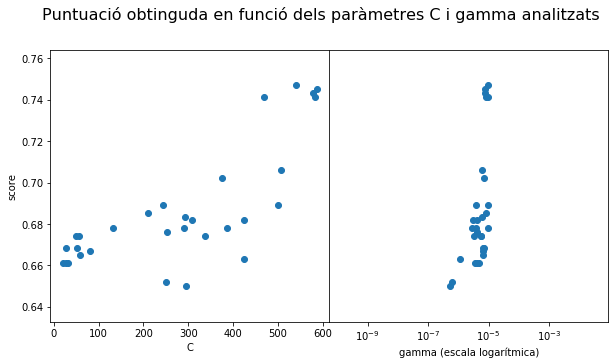

In [41]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Crea el diccionari amb els paramatres a emprar segons es requereix
param_distributions = {'C': uniform(1, 599) , 'gamma': uniform(1E-9,0.000009999) }

# Instancia l'objecte amb els parametres anteriors i amb 4 particions
random_search = RandomizedSearchCV(SVC(kernel="rbf"), param_distributions, n_iter=30, cv=4)

# Entrena el model amb les dades d'entrenament de dimensionalitat reduida
random_search.fit(X_train, y_train)

# Mostra quins parametres han donat millors resultats
print ("Els paràmetres amb els que s'ha obtingut el millor resultat són:\n{}".format(random_search.best_params_))

# Mostra les estadistiques comparatives entre la pitjor i millor puntuacio
print("\nLa diferència entre el millor valor de puntuació i el pitjor és de {:.4f},"
      .format(random_search.cv_results_["mean_test_score"].max()-random_search.cv_results_["mean_test_score"].min()))
print("el que representa que la millor puntuació és un {:.2f}% millor que la pitjor."
      .format((random_search.cv_results_["mean_test_score"].max()-random_search.cv_results_["mean_test_score"].min())
              *100/random_search.cv_results_["mean_test_score"].min()))
print()

# Mostra els grafics amb la puntuacio obtinguda en funcio dels diferents parametres analitzats
fig, ax = plt.subplots(1, 2, figsize=(10,5), gridspec_kw=dict(wspace=0))

fig.suptitle("Puntuació obtinguda en funció dels paràmetres C i gamma analitzats", x=0.5, y=1, fontsize=16)

# Mostra un grafic de la puntuacio en funcio de C
ax[0].scatter(random_search.cv_results_["param_C"].data,random_search.cv_results_["mean_test_score"])
ax[0].set_xlabel("C")
ax[0].set_ylabel("score")

# Mostra un grafic de la puntuacio en funcio de gamma, amb l'eix X en escala logaritmica per una millor visualitzacio
ax[1].set_xscale("log")
ax[1].scatter(random_search.cv_results_["param_gamma"].data,random_search.cv_results_["mean_test_score"])
ax[1].set_yticks([])
ax[1].set_xlabel("gamma (escala logarítmica)");

In [42]:
# Selecciona el millor estimador en funcio dels diferents parametres analitzats
model_svc_best = random_search.best_estimator_

# Entrena el model
model_svc_best.fit(X_train, y_train)

# Calcula la prediccio i la precisio
y_val_pred = model_svc_best.predict(X_val)
acc_svc = model_svc_best.score(X_val, y_val)

# Mostra la precio de la prediccio sobre el conjunt de dades de test
print("La precisió mitjana en el conjunt de dades de validació és del {:.4f}\n"
      .format(acc_svc))

print("------- Matriu de confusió -------")
print(confusion_matrix(y_val, y_val_pred),'\n')

print("------- Classification report -------")
print(classification_report(y_val, y_val_pred))

La precisió mitjana en el conjunt de dades de validació és del 0.8123

------- Matriu de confusió -------
[[196  21]
 [ 46  94]] 

------- Classification report -------
              precision    recall  f1-score   support

         0.0       0.81      0.90      0.85       217
         1.0       0.82      0.67      0.74       140

   micro avg       0.81      0.81      0.81       357
   macro avg       0.81      0.79      0.80       357
weighted avg       0.81      0.81      0.81       357



##### KNN

El següent mètode que farem servir és el [k veins més proxims](https://es.wikipedia.org/wiki/K_vecinos_más_próximos) de la llibreria sklearn, per predir la variable survive. En la implementació, es farà una cerca de la millor combinació dels hiperparàmetres *n_neighbors* i *weights* mitjançant l'elecció de entre totes les combinacions entre 1 i 10, per *n_neighbors*, i entre 'uniform' i 'distance' , per *weights*, el càlcul de la puntuació es realitzarà mitjançant un 4-fold Cross-Validation.

Els paràmetres amb els que s'ha obtingut el millor resultat són: {'n_neighbors': 5, 'weights': 'uniform'}


La taula de puntuació en funció del valor k (columnes) i tipologia de pesos elegits (files) és:


/home/josepm/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


,1,2,3,4,5,6,7,8,9,10
uniform,0.664794,0.676030,0.677903,0.687266,0.698502,0.689139,0.681648,0.692884,0.691011,0.689139
distance,0.664794,0.674157,0.681648,0.668539,0.692884,0.681648,0.687266,0.674157,0.687266,0.691011


La diferència entre el millor valor de puntuació i el pitjor és de 0.0337,
el que representa que la millor puntuació és un 5.07% millor que la pitjor.



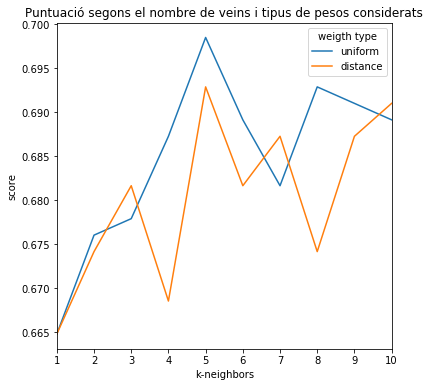

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Crea el diccionari amb els paramatres a emprar segons es requereix
param_grid = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
             'weights': ["uniform", "distance"]}

# Instancia l'objecte amb els parametres anteriors i el nombre de particions estratificades requerides
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=4)

# Entrena el model amb les dades d'entrenament de dimensionalitat reduida
grid_search.fit(X_train, y_train)

# Mostra quins parametres han donat millors resultats
print ("Els paràmetres amb els que s'ha obtingut el millor resultat són: {}".format(grid_search.best_params_))

# Carrega el resultat a un dataframe per visualitzar-lo millor
df_result = pd.DataFrame(grid_search.cv_results_["mean_test_score"].reshape(-1,2).T, columns=param_grid["n_neighbors"],
                         index=param_grid["weights"])

# Mostra el dataframe
print("\n\nLa taula de puntuació en funció del valor k (columnes) i tipologia de pesos elegits (files) és:")
display(df_result)

# Mostra les estadistiques comparatives entre la pitjor i millor puntuacio
print("La diferència entre el millor valor de puntuació i el pitjor és de {:.4f},"
      .format(df_result.values.max()-df_result.values.min()))
print("el que representa que la millor puntuació és un {:.2f}% millor que la pitjor."
      .format((df_result.values.max()-df_result.values.min())*100/df_result.values.min()))
print()


# Mostra un grafic de la puntuacio en funcio de k i els pesos emprats
ax = df_result.T.plot(figsize=(6,6))
ax.set_xlabel("k-neighbors")
ax.set_ylabel("score")
ax.legend(title="weigth type")
ax.set_title("Puntuació segons el nombre de veins i tipus de pesos considerats");

In [44]:
# Selecciona el millor estimador en funcio dels diferents parametres analitzats
model_knn_best = grid_search.best_estimator_

# Entrena el millor model
model_knn_best.fit(X_train, y_train)

# Predicció del conjunt de validacio i precisio
y_val_pred = model_knn_best.predict(X_val)
acc_knn = model_knn_best.score(X_val, y_val)

# Mostra la precio de la prediccio sobre el conjunt de dades de test
print("La precisió mitjana en el conjunt de dades de validació és del {:.4f}\n"
      .format(acc_knn))

print("------- Matriu de confusió -------")
print(confusion_matrix(y_val, y_val_pred),'\n')

print("------- Classification report -------")
print(classification_report(y_val, y_val_pred))

La precisió mitjana en el conjunt de dades de validació és del 0.7395

------- Matriu de confusió -------
[[186  31]
 [ 62  78]] 

------- Classification report -------
              precision    recall  f1-score   support

         0.0       0.75      0.86      0.80       217
         1.0       0.72      0.56      0.63       140

   micro avg       0.74      0.74      0.74       357
   macro avg       0.73      0.71      0.71       357
weighted avg       0.74      0.74      0.73       357



##### XGBoost

El següent mètode s'exposa és el [XGBoost](https://en.wikipedia.org/wiki/XGBoost) anomenat també "Extreme Gradient Boosting", implementat en la llibreria del mateix nom i que, per a més informació, es pot consultar la [documentació de la llibreria XGBoost per Python](https://xgboost.readthedocs.io/en/latest/python/index.html), per predir la variable survive. En la implementació, es farà una cerca de la millor combinació dels hiperparàmetres *learning_rate*, *max_depth*, *colsample_bytree*, *n_estimator*, *subsample* i *gamma* mitjançant l'elecció entre 50 combinacions realitzades aleatòriament entre 0.03 i 0.3, per *learning_rate*, entre 2 i 6 per *max_depth*, entre 0.3 i 0.7, per *colsample_bytree*, entre 100 i 150 per *n_estimator*, entre 0.4 i 0.6 per *subsample* i entre 0 i 0.5 , per *gamma*, el càlcul de la puntuació es realitzarà mitjançant un 4-fold Cross-Validation.

Els paràmetres amb els que s'ha obtingut el millor resultat són:
{'colsample_bytree': 0.7958491252409777, 'gamma': 0.3747139534631242, 'learning_rate': 0.04718573255762214, 'max_depth': 3, 'n_estimators': 132, 'subsample': 0.6054013160093471}

La diferència entre el millor valor de puntuació i el pitjor és de 0.0393,
el que representa que la millor puntuació és un 5.10% millor que la pitjor.



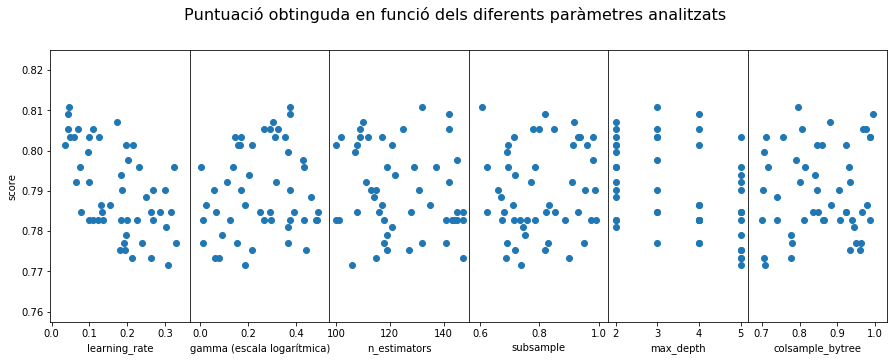

In [45]:
import xgboost as xgb
from scipy.stats import randint

# Crea el diccionari amb els paramatres a emprar segons es requereix
param_distributions = {"colsample_bytree": uniform(0.7, 0.3),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)}

# Instancia l'objecte amb els parametres anteriors i amb 4 particions
random_search = RandomizedSearchCV(xgb.XGBClassifier(objective='binary:logistic'), param_distributions, n_iter=50, cv=4)

# Entrena el model amb les dades d'entrenament de dimensionalitat reduida
random_search.fit(X_train, y_train)

# Mostra quins parametres han donat millors resultats
print ("Els paràmetres amb els que s'ha obtingut el millor resultat són:\n{}".format(random_search.best_params_))

# Mostra les estadistiques comparatives entre la pitjor i millor puntuacio
print("\nLa diferència entre el millor valor de puntuació i el pitjor és de {:.4f},"
      .format(random_search.cv_results_["mean_test_score"].max()-random_search.cv_results_["mean_test_score"].min()))
print("el que representa que la millor puntuació és un {:.2f}% millor que la pitjor."
      .format((random_search.cv_results_["mean_test_score"].max()-random_search.cv_results_["mean_test_score"].min())
              *100/random_search.cv_results_["mean_test_score"].min()))
print()

# Mostra els grafics amb la puntuacio obtinguda en funcio dels diferents parametres analitzats
fig, ax = plt.subplots(1, 6, figsize=(15,5), gridspec_kw=dict(wspace=0))

fig.suptitle("Puntuació obtinguda en funció dels diferents paràmetres analitzats", x=0.5, y=1, fontsize=16)

# Mostra un grafic de la puntuacio en funcio del learning rate
ax[0].scatter(random_search.cv_results_["param_learning_rate"].data,random_search.cv_results_["mean_test_score"])
ax[0].set_xlabel("learning_rate")
ax[0].set_ylabel("score")

# Mostra un grafic de la puntuacio en funcio de gamma, amb l'eix X en escala logaritmica per una millor visualitzacio
#ax[1].set_xscale("log")
ax[1].scatter(random_search.cv_results_["param_gamma"].data,random_search.cv_results_["mean_test_score"])
ax[1].set_yticks([])
ax[1].set_xlabel("gamma (escala logarítmica)")

# Mostra un grafic de la puntuacio en funcio de n_estimators
ax[2].scatter(random_search.cv_results_["param_n_estimators"].data,random_search.cv_results_["mean_test_score"])
ax[2].set_yticks([])
ax[2].set_xlabel("n_estimators")

# Mostra un grafic de la puntuacio en funcio de subsample
ax[3].scatter(random_search.cv_results_["param_subsample"].data,random_search.cv_results_["mean_test_score"])
ax[3].set_yticks([])
ax[3].set_xlabel("subsample")

# Mostra un grafic de la puntuacio en funcio de subsample
ax[4].scatter(random_search.cv_results_["param_max_depth"].data,random_search.cv_results_["mean_test_score"])
ax[4].set_yticks([])
ax[4].set_xlabel("max_depth")

# Mostra un grafic de la puntuacio en funcio de subsample
ax[5].scatter(random_search.cv_results_["param_colsample_bytree"].data,random_search.cv_results_["mean_test_score"])
ax[5].set_yticks([])
ax[5].set_xlabel("colsample_bytree");

In [46]:
# Selecciona el millor estimador en funcio dels diferents parametres analitzats
model_xgboost_best = random_search.best_estimator_

model_xgboost_best.fit(X_train, y_train)

# Predicció del conjunt de validacio i la seva precisio
y_val_pred = model_xgboost_best.predict(X_val)
acc_xgboost = model_xgboost_best.score(X_val, y_val)


# Mostra la precio de la prediccio sobre el conjunt de dades de test
print("La precisió mitjana en el conjunt de dades de validació és del {:.4f}\n"
      .format(acc_xgboost))

print("------- Matriu de confusió -------")
print(confusion_matrix(y_val, y_val_pred),'\n')

print("------- Classification report -------")
print(classification_report(y_val, y_val_pred))

La precisió mitjana en el conjunt de dades de validació és del 0.8263

------- Matriu de confusió -------
[[204  13]
 [ 49  91]] 

------- Classification report -------
              precision    recall  f1-score   support

         0.0       0.81      0.94      0.87       217
         1.0       0.88      0.65      0.75       140

   micro avg       0.83      0.83      0.83       357
   macro avg       0.84      0.80      0.81       357
weighted avg       0.83      0.83      0.82       357



In [47]:
# Mostra la precisió dels diferents models predictius 
result = pd.DataFrame([acc_logit, acc_svc, acc_knn, acc_xgboost], 
             index=['Logistic Regression', 'Suport Vector Classifier', 'KNN', 'XGBoost'],
             columns=['accuracy']
            )

result.index.name = 'prova'

display(result)

,accuracy
prova,
Logistic Regression,0.812325
Suport Vector Classifier,0.812325
KNN,0.739496
XGBoost,0.826331


# 6. Resolució del problema. Conclusions

Recordant que el problema inicial era obtenir una predicció de supervivència per una sèrie de passatgers (conjunt de test) i analitzant les dades de l'apartat anterior de precisió pels diferents models predictius emprats, es decideix seleccionar el model XGBoost per fer la predicció. A continuació es realitza la predicció i també es crea el fitxer que es penjarà al concurs de Kaggle.

In [48]:
# Es mostra la capçalera del dataframe de test
titanic_test_final.head()

,PassengerId,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1.0,Pclass_2.0,Pclass_3.0
0,892.0,34.0,0.0,0.0,7.8292,0.0,1.0,0.0,1.0,0.0,0,0,1
1,893.0,47.0,1.0,0.0,7.0000,1.0,0.0,0.0,0.0,1.0,0,0,1
2,894.0,62.0,0.0,0.0,9.6875,0.0,1.0,0.0,1.0,0.0,0,1,0
3,895.0,27.0,0.0,0.0,8.6625,0.0,1.0,0.0,0.0,1.0,0,0,1
4,896.0,22.0,1.0,1.0,12.2875,1.0,0.0,0.0,0.0,1.0,0,0,1


In [49]:
# Seleccio de les variables de test
X_test = titanic_test_final.iloc[:,1:]

# Predicció del conjunt de test
y_test_pred = model_xgboost_best.predict(X_test)

# S'afegeix la columna de previsio de supervivencia
titanic_test_final['Survived_pred'] = y_test_pred

# S'extreuen les dues columnes necessaries per fer el submit i es converteixen a int
result = titanic_test_final[['PassengerId', 'Survived_pred']].astype('int64')

# S'exporta el dataframe al fitxer de submissio
result.to_csv(path_or_buf=os.getcwd()+'/data/out/test_submission.csv', 
                    header=['PassengerId', 'Survived'], index=False)

Aquest fitxer s'ha penjat a la [competició Titanic de kaggle](https://www.kaggle.com/c/titanic/leaderboard) i s'ha obtingut una puntuació de 0.77990, que serveix per posicionar-se en la posició 6510 del total de 16568 respostes pujades, a data 3 de gener de 2020.

A mode de conclusió, indicar que en aquesta pràctica, primerament, s'han analitzat les dades disponibles referent als passatgers del Titanic, netejant-les i completant-les segons s'han considerat. Posteriorment, s'ha realitzat una anàlisi descriptiva de les dades, així com diferents proves estadístiques per tal d'analitzar el comportament diferenciat d'agrupacions de dades que s'han determinat després de l'observació de la distribució mostral de determinades variables, determinant-se diferències estadísticament significatives entre les diferents agrupacions estudiades. Finalment, s'ha dividit el conjunt de dades d'entrenament amb dos grups estratificats segons sexe, ja que era l'agrupació que mostrava significativament més diferències, un d'ell s'ha tractat pròpiament com el conjunt d'entrenament emprant-lo per entrenar els diferents models considerats i, l'altre, s'ha considerat com un conjunt de validació, per tal d'avaluar la precisió de cada model estudiat. En aquest sentit, s'han implementat quatre models predictius: regressió logística, vectors de suport, knn i XGBoost, obtenint la millor precisió amb el model XGBoost, que és el que s'ha emprat per obtenir la predicció en el conjunt de dades de test i que ha estat la que s'ha penjat en la competició de kaggle.

Cal indicar que la precisió obtinguda en el conjunt de test és similar a l'obtinguda en el conjunt de validació, però tot i això, és relativament baixa, menor al 80%, per tal d'intentar millorar aquesta puntuació i com a indicació per a futurs treballs, després d'analitzar altres solucions penjades en la web de la competició, seria molt interessant afegir un nou camp de "Titol" de passatger on, a partir de l'string del nom, es diferenciessin els passatgers oficials (Major, Capt, Col, etc), pertanyents a la reialesa (Sir, Countess, etc), segur que aquesta variable enriquiria el dataset i permetria millorar la puntuació.

Finalment, indicar que la valoració final de la pràctica ha estat molt positiva, ja que ens ha permés aplicar coneixements adquirits en altres assignatures i, com a resultat final, obtenir un resultat que ha estat "puntuat" en una competició.